Information Entropy : TLDR
======================

An introduction to a few big ideas in information theory including

* information entropy 
* thermodynamic entropy 
* Huffman codes

Jim Mahoney | Dec 2019

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import *
from huffman import *

<img style="float:right;width:300px" src="images/shannon.jpg" alt="By Jacobs, Konrad - https://opc.mfo.de/detail?photo_id=3807, CC BY-SA 2.0 de, https://commons.wikimedia.org/w/index.php?curid=45380422">

Claude Shannon
-------------------
* Invented the field of "information theory" in his paper [A Mathematical Theory of Communication]() (1948).
* "At Bell [Labs], he was remembered for riding the halls on a unicycle while juggling three balls," from his obit in [news.mit.edu](http://news.mit.edu/2001/shannon)
* And here's his [maze solving mouse](https://www.technologyreview.com/s/612529/mighty-mouse/) !

He defined "information entropy" as 

$$ S = \sum_i p_i \log 1/p_i $$ 

in units are "bits of information per bit".

<b>What the heck is all that?</b> Well, I'm glad you asked.

What is "information"?
==================

Suppose I send you a sequence of symbols, and you try to guess the next one in the sequence.

Here are some examples.

* A : 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, ?
* B : 1, 1, 1, 1, 1, 1, 1, ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ?
* C : 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, ?
* E : o n e _ t w ?
    
Shannon's idea was that the easier it is to guess the symbol, then the less information that symbol conveys. 

In other words, how surprised you are by a symbol is how much information it has.


Extreme cases
============

completely random :   0, 0, 1, 0, 1, 1, 0, 1, 0, ...
-----------------------

* P(1) = 1/2 , P(0) = 1/2
* S = 1 bit of information per 1 bit sent

completely predictable : 1, 1, 1, 1, 1, 1, , ...
---------------------------

* P(1) = 1 , P(0) = 0   (for example)
* S = 0 bits of information per 1 bit sent


(Why are we talking about probability all of a sudden?)

Two bits per symbol ...
=================

Suppose the sequence is made up of pairs of bits, (0,0) or (1, 1) each with 50/50 chance?

* 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, ...

* 1st bit of pair has S = 1
* 2nd bit of pair has S = 0
* altogether ?

(Would you ever want to send a sequence like this?)

Aside : entropy in physics
===============

* $\Omega$ : number of states
* i.e. how many ways a system can rearrange its micro-stuff without changing its macro properties
* ... quantum mechanics !

Entropy explains why systems move towards an equilibrium, from less likely to more likely

BEFORE : less likely (as we'll see in a minute)
<img src="images/entropy_1_3.png" style="width:300px">

AFTER : more likely
<img src="images/entropy_2_2.png" style="width:300px">


before
--------

If the stuff on the left stays on the left, and the stuff on the right stays on the right, 
then ...

<img src="images/entropy_1_3.png" style="width:300px">

* $\Omega_{left} = 4$
* $\Omega_{right} = 4$
* $\Omega_{total} = 4 * 4 = 16 $


after
-------

<img src="images/entropy_2_2.png" style="width:300px">

* $\Omega_{left} = 6 $
* $\Omega_{right} = 6 $
* $\Omega_{total} = \Omega_{left} * \Omega_{right} = 36 $ 

If all the configurations of circles are equally likely, then they
are more likely to be spread evenly between the two sides.

Combining amounts with multiplication?? 
====================

But if we want to think of $\Omega$ as a physical property, we have a problem.

* If one thing has mass 10 and another mass 20, then the total is 10 + 20 = 30
* If one volume is 7 and other is 8, then the total volume is 7 + 8 = 15.

We never find a combined total amount by multiplying amounts for each piece.

So ... use a logarhythm to turn multiplication into addition. 🤨

Entropy is not $\Omega$ but $ \log(\Omega) $ .

<img src="images/boltzman.jpg" style="float:right;width:300px" alt="By Daderot at English Wikipedia - Own work, CC BY-SA 3.0, https://commons.wikim\edia.org/w/index.php?curid=507663">

Boltzmann
========

The guy who invented the statistical version of entropy
is Ludwif Boltzmann, who even wanted the definition carved on his tombstone.

$$ S = k_B \ln \Omega $$

Let's look a little closer at this log stuff.

logs !
====

* The log of a number is its exponent : $ \log_{10} 100 = 2 $
* $ 10 * 100 = 1000 $ 
* $ 10^1 * 10^2 = 10^3 $ ... exponents add !
* $ (\log 10) + (\log 100) = (\log 1000) $

<img src="images/entropy_1_3.png" style="width:300px">

* $\Omega_{left} = 4$
* $\Omega_{right} = 4$
* $\Omega_{total} = \Omega_{left} * \Omega_{right} = 16 $  ... number of statues multiply

So ...

* $ \log_2 \Omega_{left} = 2 $
* $ \log_2 \Omega_{right} = 2$
* $ \log_2 \Omega_{total} = \log \Omega_{left} + \Omega_{right} = 4 $ ... but their logs <b>add</b>!


back to probability
===============

<img src="images/entropy_1_3.png" style="width:300px">

For each of those conceptual marbles, we turn the physics notion of "which state is this in" into the information theory idea of "which symbol are we getting now".

So we turn the number of states into a probability.

Consider $\Omega = 4$ for the picture with one of those balls in one of four states.

The probability of finding it in a one of those four is $ p = 1/4$ .

$$ \log \Omega = \log \frac{1}{p} $$

... which is <i>almost</i> Shannon's information entropy formula.

per symbol
=========

The last step in connecting physics entropy to information entropy is to see that 
the physics entropy is defined for the whole system,
while Shannon's information entropy is defined per symbol in the sequence.

So if we have many symbols $i$ with different probabilities $p_i$, each with an 
entropy $\log 1/p_i$, the last step is to just average them to get

information entropy
-------------------------------

$$ S = \sum_i p_i \log 1/p_i $$ 


Wait, that was an average !?
======================

Yes, for any $f(x)$, the average of f(x) is $\sum p(x) f(x)$.

To see this, lets take the average of these numbers.

$$ (1, 1, 1, 5, 5, 10) $$

The average is often written as

$$ \frac{ 1 + 1 + 1 + 5 + 5 + 10 }{6} $$

But that can also be written in terms of how many of each we have

$$ \frac{3 * 1 + 2 * 5 + 1 * 10}{6} = \frac{3}{6} * 1 + \frac{2}{6} * 5 + \frac{1}{6} * 10 $$

Or in other words,

$$ \text{average}(x) = \sum p(x) * x $$

where $p(x)$ is the probability of x.


Back to bits
============

For binary data of 0's and 1's, if each bit arriving doesn't depend on the previous ones,
then our model of the data is just the probability of each. If we let $P_0$ = (probability of 0), then

$$ P_0 + P_1 = 1 $$

Our formula for information entropy is then just 

$$ S = P_0 * \log2 \frac{1}{P_0} + P_1 * \log2 \frac{1}{P_1} $$

or

$$ S = P_0 * \log2 \frac{1}{P_0} + (1 - P_0) * \log2 \frac{1}{ 1 - P_0 } $$

And this is something we can plot.

The entropy is highest at "1 bit of information per 1 bit of data" at $P_0 = P_1 = 0.5$ .
Anything else has less information per bit.

In [30]:
def s(p):
    return p * log2(1/p) + (1-p)*log2(1/(1-p))
def plot_entropy():
    with plt.xkcd():
        p0 = linspace(0.01,0.99)
        figure = plt.figure(dpi=220, figsize=(3, 2))
        axis = figure.add_subplot(111)
        axis.set(xlabel="$P_0$ = probability of 0", ylabel="S = info entropy", title="independent 0's and 1's")
        axis.set_xlim((0, 1)); 
        axis.set_ylim((0, 1.1))
        axis.plot(p0, s(p0), color="blue")
        plt.show()

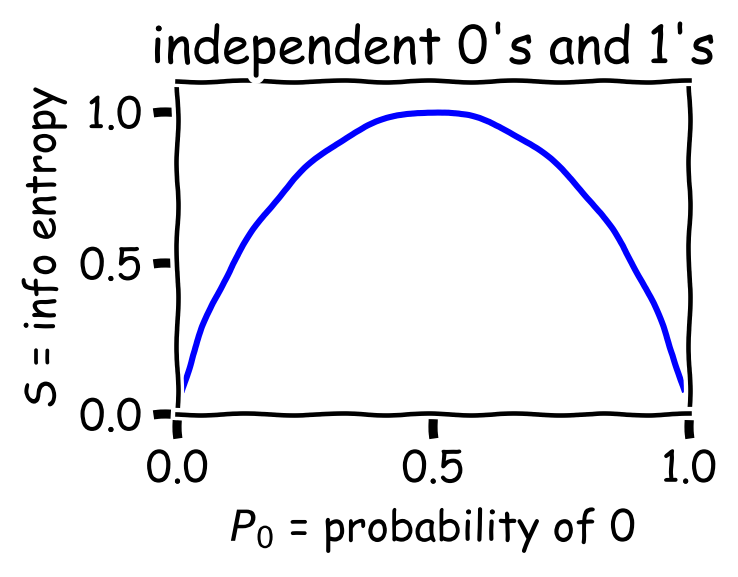

In [32]:
plot_entropy()  # .. and who doesn't like plots in xkcd style?

Let's see some code!
=================

OK, time for a somewhat more realistic example.

This week I've been reading "The Wandering Inn" ([wanderinginn.com](https://wanderinginn.com)).
Here's the first paragraph.

    The inn was dark and empty. It stood, silent, 
    on the grassy hilltop, the ruins of other structures 
    around it. Rot and age had brought low other buildings; 
    the weather and wildlife had reduced stone foundations 
    to rubble and stout wooden walls to a few rotten pieces 
    of timber mixed with the ground. But the inn still stood.

Can we find the information entropy of that? And what will that mean?

In [12]:
# Using just the probabilities of individual characters, 
# without looking for longer patterns the analysis looks like this.
text = 'The inn was dark and empty. It stood, silent, ' + \
       'on the grassy hilltop, the ruins of other structures ' + \
       'around it. Rot and age had brought low other buildings; ' + \
       'the weather and wildlife had reduced stone foundations ' + \
       'to rubble and stout wooden walls to a few rotten pieces ' + \
       'of timber mixed with the ground. But the inn still stood.'

count = {}                   # {character: count} i.e. {'T':34, ...}
for character in text:
    count[character] = 1 + count.get(character, 0)
    
n_characters = sum(list(count.values()))

probability = {}             # {character: probability} i.e. {'T': 0.04, ...}
for character in count:
    probability[character] = count[character] / n_characters
    
entropy = 0
for p in probability.values():
    entropy += p * log2(1/p)         # information entropy formula !
print('entropy is ', entropy)

entropy is  4.166746762972305


And so?
=====

* What does an entropy of 4.2 bits of information per symbol mean?
* Well, characters are typically stored in [ASCII](http://www.asciitable.com/) i.e. 8 bits each.
* ... but it looks like we don't need that many bits for files like this.
* This tells us how much that file might possibly be compressed (from 8 to 4.2) 
* ... without losing any of its information.
* And since our probability model is simplistic here - only looking at one letter at a time - more compression is likely possible.


[Huffman](http://www.huffmancoding.com/my-uncle/scientific-american) code
============

* But how can we actually accomplish that compression?
* One way is to use something like Morse code.
* The idea is to have fewer bits for most likely characters.

Turns out there's a clever way to construct such a scheme: 

1. sort symbols by probability, low to high
2. build a binary tree by combining the probability of the two lowest
3. read off the codes as left=0, right=1, top to bottom

This scheme gives us a code which has the property that no
character is the start of some other character, which means
we don't need anything extra to tell characters apart.

Huffman example
==============

Suppose we have four symbols (00, 01, 10, 11) with probabilities (0.6, 0.2, 0.1, 0.1).

<img src="images/demo_huffman.png" style="width:400">

    symbol    code
      
    00        1
    01        01
    11        001
    10        0000

Huffman for Wandering Inn ?
================

* [huffman.py](src/huffman.py.html)
* [analyze_wander.py](src/analyze_wander.py.html)


In [3]:
"""
 huffman.py 

 generate huffman codes from probabilities

 history
  Feb 2014   original
  Dec 2019   added entropy function; upgraded to python3

 tested with python 3.6

 Jim Mahoney | cs.marlboro.college | MIT License
"""
from heapq import heappush, heappop
from numpy import log2

def get_probabilities(symbols):
    """ Return a dict of {symbol:probability} given a collection of symbols
        >>> p = get_probabilities(['a', 'b', 'a', 'c'])
        >>> [(x, p[x]) for x in sorted(p.keys())]
        [('a', 0.5), ('b', 0.25), ('c', 0.25)]
    """
    counts = {}  # {symbol:count}
    for s in symbols:
        counts[s] = 1 + counts.get(s, 0)
    n = float(len(symbols))
    return {s : counts[s]/n for s in counts.keys()}

def entropy(probabilities):
    """ return independent probability model info entropy """
    return sum(map(lambda p: p * log2(1/p), probabilities.values()))

class PriorityQueue:
    """ A min priority queue is a data structure which can
          * add values (push), 
          * find (peek) the smallest, and
          * remove (pop) the smallest. 
        >>> pq = PriorityQueue([5, 3, 10, 7])
        >>> (pq.pop(), pq.pop())
        (3, 5)
        >>> pq.push(9)
        >>> (pq.pop(), pq.pop())
        (7, 9)
    """
    def __init__(self, values=[], sortkey=lambda x:x):
        self.sortkey = sortkey
        self.data = []
        for value in values:
            self.push(value)
    def peek(self):
        return self.data[0][1]
    def push(self, value):
        heappush(self.data, (self.sortkey(value), value))
    def pop(self):
        (key, item) = heappop(self.data)
        return item
    def __len__(self):
        return len(self.data)
    def values(self):
        return [keyvalue[1] for keyvalue in self.data]

class BinaryTree:
    """ A node in a binary tree """
    # or equivalently the root of a binary subtree
    def __init__(self, name='', data=0, 
                 parent=None, left=None, right=None):
        self.name = name if name != '' else str(data)
        self.data = data
        self.parent = parent
        self.set_children(left, right)
    def set_children(self, left, right):
        self.left = left
        self.right = right
        for child in (left, right):
            if child != None:
                child.parent = self
    def __lt__(self, other):
        return self.data < other.data
    def graphviz(self, labels=False):
        """ return graphviz text description of tree """
        # for a directed graph, use 'digraph {' and '->' instead of '--'
        result = 'graph {\n'
        if labels:
            result += self._graphviz_labels()
        result += self._graphviz_subtree(use_ids=labels)
        return result + '}\n'
    def _graphviz_labels(self):
        """ one line for each node setting a label with name and data """
        result = '  {} [label="{} ({:0.2})"];\n'.format(
            id(self), self.name, self.data)
        for child in (self.left, self.right):
            if child:
                result += child._graphviz_labels()
        return result
    def _graphviz_subtree(self, use_ids):
        """ recursively return the description of this node and those below """
        result = ''
        for child in (self.left, self.right):
            if child:
                result += '  {} -- {};\n'.format(
                    self.name if not use_ids else id(self),
                    child.name if not use_ids else id(child))
                result += child._graphviz_subtree(use_ids)
        return result

class Huffman(PriorityQueue):
    """ A class which creates a Huffman code from
        a dict of symbol names and probabilities.
        >>> h = Huffman({'00': 0.6, '01': 0.2, '10': 0.1, '11': 0.1})
        >>> [(s, h.huffman_code[s]) for s in sorted(h.huffman_code.keys())]
        [('00', '1'), ('01', '00'), ('10', '010'), ('11', '011')]
        >>> h.mean_code_length()
        1.6
    """
    # 
    def __init__(self, symbol_probabilities):
        self.probabilities = symbol_probabilities
        self.symbols = sorted(self.probabilities.keys())
        self.huffman_tree = None   # root of huffman binary tree
        self.huffman_code = {}     # {symbol:code} dictionary
        PriorityQueue.__init__(self, sortkey = lambda x: x.data)
        for (symbol, probability) in self.probabilities.items():
            self.push(BinaryTree(name=symbol, data=probability))
        self.leaves = self.values() # save a copy of list of terminal nodes
        self._build_huffman_tree()
        self._build_huffman_code()
    def _build_huffman_tree(self):
        """ Build the huffman tree and store it in self.huffman_tree """
        # The idea is to repeatedly create a new node in the tree
        # whose probability is the sum of the two smallest which 
        # haven't yet been combined. Here this is accomplished with
        # two data structures: a PriorityQueue to keep track of which
        # probabilities still need to be looked at, and which is 
        # the smallest, and a BinaryTree collection.
        while len(self) > 1:
            item1 = self.pop()
            item2 = self.pop()
            data = item1.data + item2.data # probability
            self.huffman_tree = BinaryTree(name='*', data=data, 
                                           left=item1, right=item2)
            self.push(self.huffman_tree)
    def _build_huffman_code(self, node=None, code=''):
        """ Build a dictionary of {symbol:codeword} in self.huffman_code """
        if node == None:
            node = self.huffman_tree
        if node.name == '*':  # intermediate node ?
            self._build_huffman_code(node.left, code + '0')
            self._build_huffman_code(node.right, code + '1')
        else:                    # terminal node, i.e. an original symbol
            self.huffman_code[node.name] = code
    def mean_code_length(self):
        return sum([self.probabilities[sym] * len(self.huffman_code[sym]) 
                    for sym in self.symbols])

def print_demo_graphviz():
    """ print output suitable for graphviz (dot)
        >>> print_demo_graphviz()
        graph {
          0 -- 1;
          1 -- 3;
          0 -- 2;
        }
        <BLANKLINE>
    """
    # To generate demo_graph.png :
    # $ python huffman.py demo_graphviz | dot -Tpng > demo_graph.png
    nodes = [BinaryTree(name=i) for i in range(4)]
    nodes[0].set_children(nodes[1], nodes[2])
    nodes[1].set_children(nodes[3], None)
    print(nodes[0].graphviz())

def print_huffman_graphviz():
    """ print output suitable for graphviz (dot) for huffman tree """
    # To generate huffman_graph.png :
    # $ python huffman.py huffman_graphviz | dot -Tpng > huffman_graph.png
    h = Huffman({'00': 0.6, '01': 0.2, '10': 0.1, '11': 0.1})
    print(h.huffman_tree.graphviz(labels=True))
    
def main():
    import sys
    if len(sys.argv) > 1 and sys.argv[1] == 'demo_graphviz':
        print_demo_graphviz()
    if len(sys.argv) > 1 and sys.argv[1] == 'huffman_graphviz':
        print_huffman_graphviz()
    
if __name__ == '__main__':
    import doctest
    doctest.testmod()
    main()

In [4]:
"""
 analyze_wander.py

 Find the information entropy and huffman code for
 the first paragraph of text of "The Wandering Inn"
 https://wanderinginn.com/2016/07/27/1-00/
 (which is what I happen to be reading this week).

 Running this :

   $ python2 analyze_wander.py ; dot wander.dot -Tpng > wander.png

 (The "dot" program is a graphviz, a graph generating tool)

 produces this :

     " "  0.17647   111
     ","  0.00929   1001111
     "."  0.01238   011010
     ";"  0.00310   110101110
     "B"  0.00310   110101111
     "I"  0.00310   01101110
     "R"  0.00310   01101111
     "T"  0.00310   10011100
     "a"  0.04644   0000
     "c"  0.00929   1101000
     "b"  0.01548   100100
     "e"  0.08050   1100
     "d"  0.05573   0111
     "g"  0.01548   100101
     "f"  0.01548   100110
     "i"  0.04954   0100
     "h"  0.04334   11011
     "k"  0.00310   10011101
     "m"  0.00929   1101001
     "l"  0.03715   10110
     "o"  0.07430   1010
     "n"  0.05882   1000
     "p"  0.00929   1101010
     "s"  0.04954   0101
     "r"  0.04644   0001
     "u"  0.03715   10111
     "t"  0.09598   001
     "w"  0.02477   01100
     "y"  0.00619   0110110
     "x"  0.00310   11010110
    entropy =  4.16674676297
    mean code length =  4.21052631579

 Jim Mahoney | cs.marlboro.college | Dec 2019 | MIT License
"""
from huffman import *

# From wanderinginn.com, chapter 1
text = 'The inn was dark and empty. It stood, silent, on the grassy hilltop, the ruins of other structures around it. Rot and age had brought low other buildings; the weather and wildlife had reduced stone foundations to rubble and stout wooden walls to a few rotten pieces of timber mixed with the ground. But the inn still stood.'

print('--- info entropy & Huffman ---')
print('text:')
print(text)
print('probabilities & huffman codes ')
probabilities = get_probabilities(text)
h = Huffman(probabilities)
for char in probabilities:
    print(' "{}"  {:.5f}   {}'.format(
        char, probabilities[char], h.huffman_code[char]))
print('entropy = ', entropy(probabilities))
print('mean code length = ', h.mean_code_length())
open('wander.dot', 'w').write(h.huffman_tree.graphviz(labels=True))


--- info entropy & Huffman ---
text:
The inn was dark and empty. It stood, silent, on the grassy hilltop, the ruins of other structures around it. Rot and age had brought low other buildings; the weather and wildlife had reduced stone foundations to rubble and stout wooden walls to a few rotten pieces of timber mixed with the ground. But the inn still stood.
probabilities & huffman codes 
 "T"  0.00310   110101110
 "h"  0.04334   11011
 "e"  0.08050   1100
 " "  0.17647   111
 "i"  0.04954   0100
 "n"  0.05882   1000
 "w"  0.02477   01100
 "a"  0.04644   0001
 "s"  0.04954   0101
 "d"  0.05573   0111
 "r"  0.04644   0000
 "k"  0.00310   110101111
 "m"  0.00929   1101010
 "p"  0.00929   1001011
 "t"  0.09598   001
 "y"  0.00619   1001010
 "."  0.01238   011011
 "I"  0.00310   11010110
 "o"  0.07430   1010
 ","  0.00929   1101001
 "l"  0.03715   10110
 "g"  0.01548   100110
 "u"  0.03715   10111
 "f"  0.01548   100111
 "c"  0.00929   1101000
 "R"  0.00310   01101011
 "b"  0.01548   10010

4512

wandering inn huffman tree
======================

<img src="images/wander.png" style="width:800px">

What comes next ?
===============

This is the start of information theory, but of course
there's still lots more good stuff :

* more sophisticated probability models (i.e. better ways guess what's coming)
* more lossless compression algorithms (LZW, BZIP, ...)
* lossy (i.e. lose info) compression for images, sound, video (jpeg, ogg, mp3, ...)
* error correcting codes : add redundancy so that noise & bit errors can be undone


In conclusion
=============

* "information entropy" is a profound and useful concept
* intimately connected to randomness 
* analogous to physics entropy

Questions?
-------------